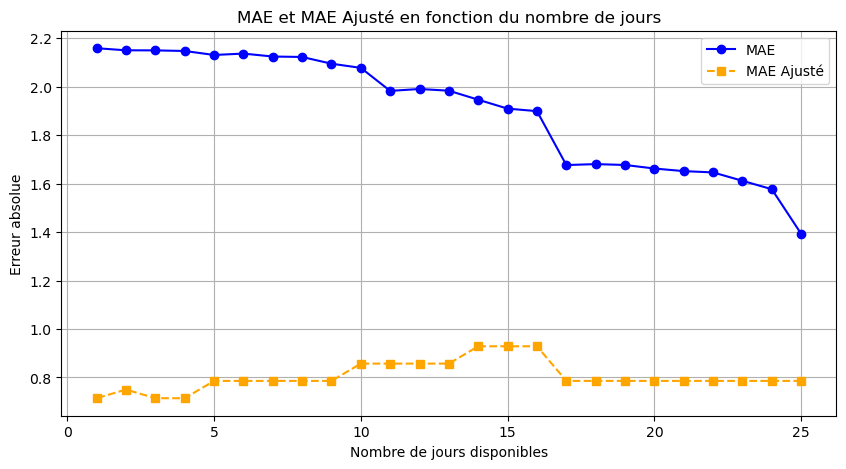

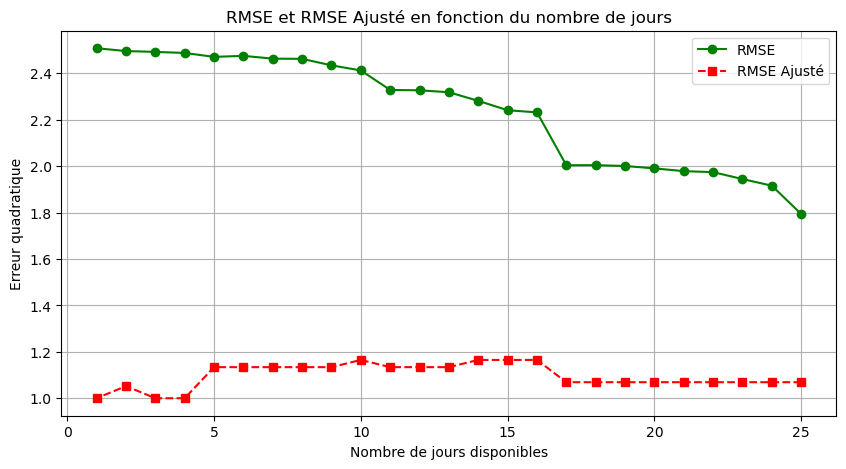

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from predict import PREDICT23, PREDICT24, MAE, RMSE, MAE_ajuste, RMSE_ajuste

# On créer une variable qui représentera la nombre de jour utilisé pour prédire le classement
y = np.linspace(25, 1, num=25)  

# On trace un premier graphe contenant l'erreur e valeur absolue  (MAE et MAE ajusté)
plt.figure(figsize=(10, 5))
plt.plot(y, MAE, label='MAE', marker='o', linestyle='-', color='blue')
plt.plot(y, MAE_ajuste, label='MAE Ajusté', marker='s', linestyle='--', color='orange')
plt.xlabel('Nombre de jours disponibles')
plt.ylabel('Erreur absolue')
plt.title('MAE et MAE Ajusté en fonction du nombre de jours')
plt.legend()
plt.grid(True)
plt.show()

# On trace un deuxième graphe pour la racine carré de l'erreur quadratique (RMSE et RMSE ajusté)
plt.figure(figsize=(10, 5))
plt.plot(y, RMSE, label='RMSE', marker='o', linestyle='-', color='green')
plt.plot(y, RMSE_ajuste, label='RMSE Ajusté', marker='s', linestyle='--', color='red')
plt.xlabel('Nombre de jours disponibles')
plt.ylabel('Racine carré de l erreur quadratique')
plt.title('RMSE et RMSE Ajusté en fonction du nombre de jours')
plt.legend()
plt.grid(True)
plt.show()
